<a href="https://colab.research.google.com/github/mmtog/Regresi-nNoLineal/blob/main/M1_Actividad_2_Mexico(Preparaci%C3%B3n_de_la_base_de_Datos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los archivos CSV
df_mexico = pd.read_csv("Mexico.csv")


In [ ]:
#Verificamos información del DataFrame
df_mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26536 entries, 0 to 26535
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26536 non-null  int64  
 1   name                            26536 non-null  object 
 2   host_id                         26536 non-null  int64  
 3   host_name                       26536 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26536 non-null  object 
 6   latitude                        26536 non-null  float64
 7   longitude                       26536 non-null  float64
 8   room_type                       26536 non-null  object 
 9   price                           23338 non-null  float64
 10  minimum_nights                  26536 non-null  int64  
 11  number_of_reviews               26536 non-null  int64  
 12  last_review                     

In [ ]:
#Imprimo los primeros 5 registro del dataframe
df_mexico.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,3663.0,1,0,NaN,NaN,1,363,0,NaN
1,898633,City SkyLine View from 1 Bedroom Apt in CDMX,4796027,Marco,NaN,Cuauhtémoc,19.42063,-99.16586,Entire home/apt,1652.0,3,56,2024-04-17,0.41,3,262,3,NaN
2,44616,CONDESA HAUS B&B,196253,Fernando,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,18000.0,1,64,2023-03-26,0.42,13,364,0,NaN
3,913084,15 blocks from Paseo de la Reforma,4647293,Martina,NaN,Miguel Hidalgo,19.43956,-99.17263,Entire home/apt,814.0,2,161,2024-05-21,1.19,1,236,6,NaN
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,NaN,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1923.0,2,49,2024-05-05,0.32,2,361,4,NaN


In [ ]:
#Eliminar columnas innecesarias
#axis = 1 para columnas
#axis = 0 para filas
df_mexico = df_mexico.drop(['0', 'Referencia'], axis=1, errors='ignore')
df_mexico

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3663.0,1,0,NaN,NaN,1,363,0,NaN
1,898633,City SkyLine View from 1 Bedroom Apt in CDMX,4796027,Marco,NaN,Cuauhtémoc,19.420630,-99.165860,Entire home/apt,1652.0,3,56,2024-04-17,0.41,3,262,3,NaN
2,44616,CONDESA HAUS B&B,196253,Fernando,NaN,Cuauhtémoc,19.411620,-99.177940,Entire home/apt,18000.0,1,64,2023-03-26,0.42,13,364,0,NaN
3,913084,15 blocks from Paseo de la Reforma,4647293,Martina,NaN,Miguel Hidalgo,19.439560,-99.172630,Entire home/apt,814.0,2,161,2024-05-21,1.19,1,236,6,NaN
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,NaN,Cuauhtémoc,19.411520,-99.168570,Entire home/apt,1923.0,2,49,2024-05-05,0.32,2,361,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,1187191423076770832,¡Crystal! - 7BR Fantastic! In heart of Roma,19255745,Elvy,NaN,Cuauhtémoc,19.404546,-99.168252,Entire home/apt,7850.0,2,0,NaN,NaN,8,365,0,NaN
26532,1187248376951514656,Iconic Suite | Terrace | View !,7681206,Nicolas,NaN,Cuauhtémoc,19.420567,-99.166263,Entire home/apt,1478.0,1,0,NaN,NaN,11,363,0,NaN
26533,1187269835146549014,Acogedor y moderno depa en la Condesa,50951150,Sandra,NaN,Cuauhtémoc,19.408648,-99.170992,Entire home/apt,936.0,2,0,NaN,NaN,1,363,0,NaN
26534,1187283698786191137,Estudio con amplia terraza,147254250,Salomon,NaN,Cuauhtémoc,19.412367,-99.166447,Entire home/apt,768.0,1,0,NaN,NaN,3,254,0,NaN


In [ ]:
#Identificar valores nulos por columna
valores_nulos=df_mexico.isnull().sum()
valores_nulos

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,26536
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,3198


In [ ]:
##SUSTITUCIÓN
df_mexico1=df_mexico.copy()
df_mexico1["neighbourhood_group"] = df_mexico1["neighbourhood_group"].fillna(method="ffill")
df_mexico1

<ipython-input-6-c31a8090b41d>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_mexico1["neighbourhood_group"] = df_mexico1["neighbourhood_group"].fillna(method="ffill")


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35797,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3663.0,1,0,NaN,NaN,1,363,0,NaN
1,898633,City SkyLine View from 1 Bedroom Apt in CDMX,4796027,Marco,NaN,Cuauhtémoc,19.420630,-99.165860,Entire home/apt,1652.0,3,56,2024-04-17,0.41,3,262,3,NaN
2,44616,CONDESA HAUS B&B,196253,Fernando,NaN,Cuauhtémoc,19.411620,-99.177940,Entire home/apt,18000.0,1,64,2023-03-26,0.42,13,364,0,NaN
3,913084,15 blocks from Paseo de la Reforma,4647293,Martina,NaN,Miguel Hidalgo,19.439560,-99.172630,Entire home/apt,814.0,2,161,2024-05-21,1.19,1,236,6,NaN
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,NaN,Cuauhtémoc,19.411520,-99.168570,Entire home/apt,1923.0,2,49,2024-05-05,0.32,2,361,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,1187191423076770832,¡Crystal! - 7BR Fantastic! In heart of Roma,19255745,Elvy,NaN,Cuauhtémoc,19.404546,-99.168252,Entire home/apt,7850.0,2,0,NaN,NaN,8,365,0,NaN
26532,1187248376951514656,Iconic Suite | Terrace | View !,7681206,Nicolas,NaN,Cuauhtémoc,19.420567,-99.166263,Entire home/apt,1478.0,1,0,NaN,NaN,11,363,0,NaN
26533,1187269835146549014,Acogedor y moderno depa en la Condesa,50951150,Sandra,NaN,Cuauhtémoc,19.408648,-99.170992,Entire home/apt,936.0,2,0,NaN,NaN,1,363,0,NaN
26534,1187283698786191137,Estudio con amplia terraza,147254250,Salomon,NaN,Cuauhtémoc,19.412367,-99.166447,Entire home/apt,768.0,1,0,NaN,NaN,3,254,0,NaN


In [ ]:
df_mexico1["license"] = df_mexico1["license"].fillna(method="bfill")
df_mexico1["reviews_per_month"] = df_mexico1["reviews_per_month"].fillna(round(df_mexico1["reviews_per_month"].mean(), 2))
df_mexico1["price"] = df_mexico1["price"].fillna(df_mexico1["price"].median())


<ipython-input-7-0b851e08e9dd>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_mexico1["license"] = df_mexico1["license"].fillna(method="bfill")


In [ ]:
#Corroboramos valores nulos
valores_nulos=df_mexico1.isnull().sum()
valores_nulos

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,26536
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
print(df_mexico1.dtypes)


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object


In [ ]:
print(df_mexico1.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')


In [ ]:
##eliminar colundas con nas
df_mexico1 = df_mexico1.drop(columns=['license', 'neighbourhood_group'])


In [ ]:
df_mexico1['last_review'].fillna(pd.to_datetime('2022-01-01'), inplace=True)

In [ ]:
# Verificar los valores nulos restantes
valores_nulos = df_mexico1.isnull().sum()
print(valores_nulos)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64


In [ ]:
# Realizar una copia del dataframe original para no modificarlo directamente
df_mexico2 = df_mexico1.copy()

In [ ]:
df_mexico2

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3663.0,1,0,2022-01-01 00:00:00,1.70,1,363,0
1,898633,City SkyLine View from 1 Bedroom Apt in CDMX,4796027,Marco,Cuauhtémoc,19.420630,-99.165860,Entire home/apt,1652.0,3,56,2024-04-17,0.41,3,262,3
2,44616,CONDESA HAUS B&B,196253,Fernando,Cuauhtémoc,19.411620,-99.177940,Entire home/apt,18000.0,1,64,2023-03-26,0.42,13,364,0
3,913084,15 blocks from Paseo de la Reforma,4647293,Martina,Miguel Hidalgo,19.439560,-99.172630,Entire home/apt,814.0,2,161,2024-05-21,1.19,1,236,6
4,67703,"2 bedroom apt. deco bldg, Condesa",334451,Nicholas,Cuauhtémoc,19.411520,-99.168570,Entire home/apt,1923.0,2,49,2024-05-05,0.32,2,361,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26531,1187191423076770832,¡Crystal! - 7BR Fantastic! In heart of Roma,19255745,Elvy,Cuauhtémoc,19.404546,-99.168252,Entire home/apt,7850.0,2,0,2022-01-01 00:00:00,1.70,8,365,0
26532,1187248376951514656,Iconic Suite | Terrace | View !,7681206,Nicolas,Cuauhtémoc,19.420567,-99.166263,Entire home/apt,1478.0,1,0,2022-01-01 00:00:00,1.70,11,363,0
26533,1187269835146549014,Acogedor y moderno depa en la Condesa,50951150,Sandra,Cuauhtémoc,19.408648,-99.170992,Entire home/apt,936.0,2,0,2022-01-01 00:00:00,1.70,1,363,0
26534,1187283698786191137,Estudio con amplia terraza,147254250,Salomon,Cuauhtémoc,19.412367,-99.166447,Entire home/apt,768.0,1,0,2022-01-01 00:00:00,1.70,3,254,0


In [ ]:
# Convertir la columna 'price' a numérica (quitar símbolos de dólar y convertir a float)
df_mexico2['price'] = df_mexico2['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
# Sustituir valores nulos en 'price' por la mediana de los precios
df_mexico2["price"]=df_mexico2["price"].fillna(round(df_mexico1["price"].median(),1))

OUTLINERS

In [ ]:
print(len(df_mexico2.columns))


16


In [ ]:
# Seleccionar columnas cualitativas y cuantitativas por nombre
Cualitativas = df_mexico2[['host_id', 'host_name', 'neighbourhood', 'room_type', 'last_review', 'calculated_host_listings_count', 'availability_365']]
Cuantitativas = df_mexico2[['id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm']]


<Figure size 2000x800 with 0 Axes>

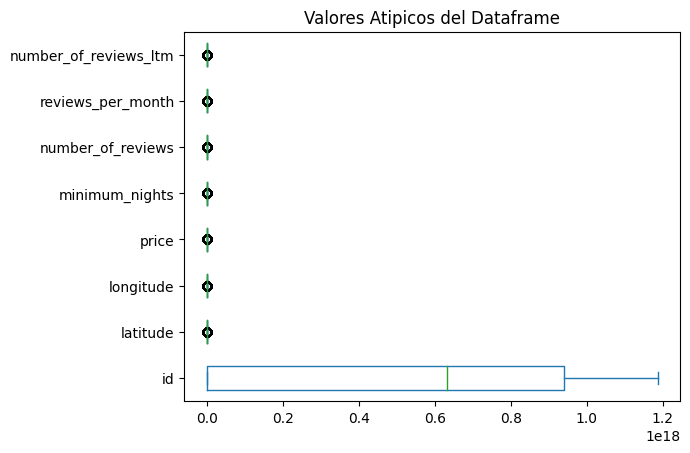

In [ ]:
#Identificación y tratamiento de valores atípicos (outliers)

#Realizamos diagrama de caja y bigote de cada columna del dataframe
fig=plt.figure(figsize=(20,8))
Cuantitativas.plot(kind="box",vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

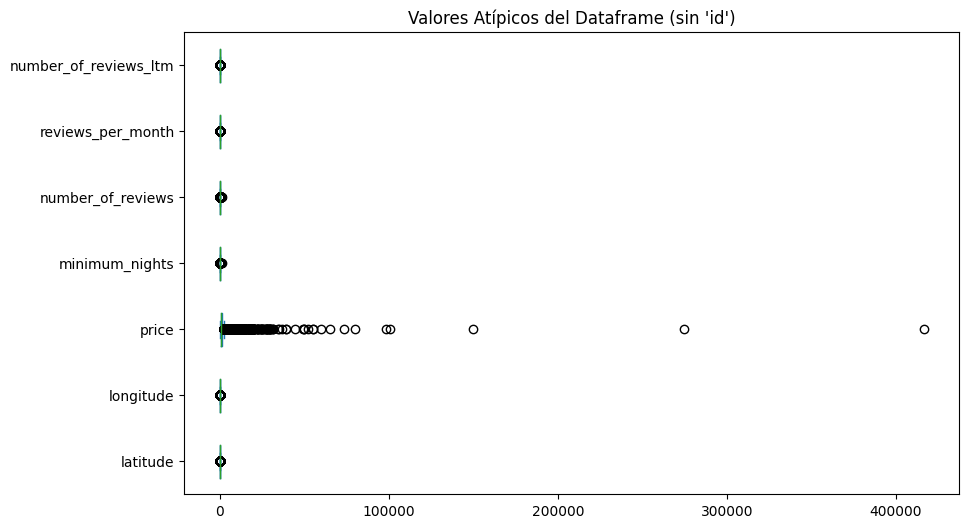

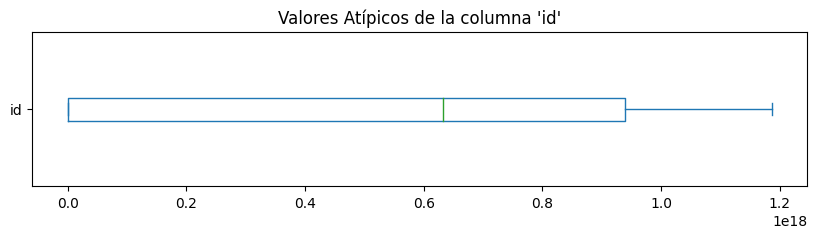

In [ ]:
# Separar la columna 'id' de las demás columnas cuantitativas
Cuantitativas_sin_id = Cuantitativas.drop(columns=['id'])

# Diagrama de caja y bigote para las demás columnas cuantitativas
fig, ax = plt.subplots(figsize=(10, 6))
Cuantitativas_sin_id.plot(kind="box", vert=False, ax=ax)
plt.title("Valores Atípicos del Dataframe (sin 'id')")
plt.show()

# Diagrama de caja y bigote solo para la columna 'id'
fig, ax = plt.subplots(figsize=(10, 2))
Cuantitativas['id'].plot(kind="box", vert=False, ax=ax)
plt.title("Valores Atípicos de la columna 'id'")
plt.show()


In [ ]:
# Filtrar valores donde el precio sea mayor a 0
df_filtered = df_mexico1[df_mexico1["price"] > 0]

# Verificar valores nulos en la columna "price"
print("Casillas vacías en price:", df_filtered['price'].isnull().sum())


Casillas vacías en price: 0


In [ ]:
# Método del IQR para identificar y eliminar valores atípicos
Q1 = Cuantitativas['price'].quantile(0.25)
Q3 = Cuantitativas['price'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar valores atípicos
Cuantitativas_filtrado = Cuantitativas[(Cuantitativas['price'] >= limite_inferior) & (Cuantitativas['price'] <= limite_superior)]


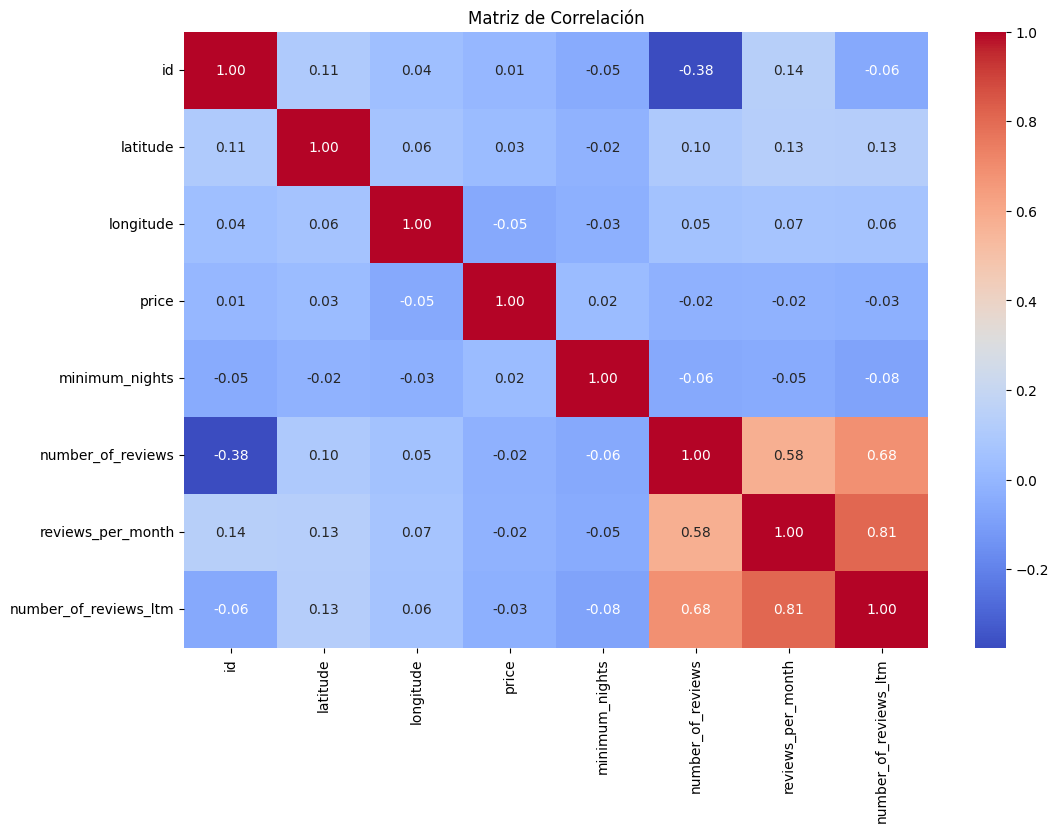

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(Cuantitativas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [ ]:
#Metodo aplicando cuartiles encuentro cuartiles 0.25 y 0.75
y=Cuantitativas

percentile25=y.quantile(0.25) #q1
percentile75=y.quantile(0.75) #q3
iqr=percentile75-percentile25

Limite_Superior= percentile75+1.5*iqr
Limite_Inferior=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido id                       2.350126e+18
latitude                 1.949363e+01
longitude               -9.911756e+01
price                    2.645500e+03
minimum_nights           3.500000e+00
number_of_reviews        1.280000e+02
reviews_per_month        4.570000e+00
number_of_reviews_ltm    5.000000e+01
dtype: float64
Limite inferior permitido id                      -1.410076e+18
latitude                 1.932884e+01
longitude               -9.921609e+01
price                   -5.425000e+02
minimum_nights          -5.000000e-01
number_of_reviews       -7.200000e+01
reviews_per_month       -1.910000e+00
number_of_reviews_ltm   -3.000000e+01
dtype: float64


In [ ]:
#Obtenemos datos y los outliners se convierten en nulos en el dataframe
Cuantitativas1=Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Cuantitativas1

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm
0,35797,19.382830,NaN,NaN,1.0,0.0,1.70,0.0
1,898633,19.420630,-99.165860,1652.0,3.0,56.0,0.41,3.0
2,44616,19.411620,-99.177940,NaN,1.0,64.0,0.42,0.0
3,913084,19.439560,-99.172630,814.0,2.0,NaN,1.19,6.0
4,67703,19.411520,-99.168570,1923.0,2.0,49.0,0.32,4.0
...,...,...,...,...,...,...,...,...
26531,1187191423076770832,19.404546,-99.168252,NaN,2.0,0.0,1.70,0.0
26532,1187248376951514656,19.420567,-99.166263,1478.0,1.0,0.0,1.70,0.0
26533,1187269835146549014,19.408648,-99.170992,936.0,2.0,0.0,1.70,0.0
26534,1187283698786191137,19.412367,-99.166447,768.0,1.0,0.0,1.70,0.0


In [ ]:
# Identificar valores nulos por columna después de eliminar outliers
valores_nulos_outliers = Cuantitativas1.isnull().sum()
valores_nulos_outliers

,0
id,0
latitude,1773
longitude,2814
price,2097
minimum_nights,3507
number_of_reviews,2381
reviews_per_month,1423
number_of_reviews_ltm,1418


In [ ]:
#Reemplazamos valores atípicos (nulos) del df con "mean"
#Realizamos copia del df
Cuantitativas_limpio=Cuantitativas1.copy()
Cuantitativas_limpio=Cuantitativas_limpio.fillna(round(Cuantitativas1.mean(),1))
Cuantitativas_limpio

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,number_of_reviews_ltm
0,35797,19.382830,-99.200000,1016.7,1.0,0.0,1.70,0.0
1,898633,19.420630,-99.165860,1652.0,3.0,56.0,0.41,3.0
2,44616,19.411620,-99.177940,1016.7,1.0,64.0,0.42,0.0
3,913084,19.439560,-99.172630,814.0,2.0,25.2,1.19,6.0
4,67703,19.411520,-99.168570,1923.0,2.0,49.0,0.32,4.0
...,...,...,...,...,...,...,...,...
26531,1187191423076770832,19.404546,-99.168252,1016.7,2.0,0.0,1.70,0.0
26532,1187248376951514656,19.420567,-99.166263,1478.0,1.0,0.0,1.70,0.0
26533,1187269835146549014,19.408648,-99.170992,936.0,2.0,0.0,1.70,0.0
26534,1187283698786191137,19.412367,-99.166447,768.0,1.0,0.0,1.70,0.0


In [ ]:
# Corroborar valores nulos finales después del tratamiento de outliers
valores_nulos_final = Cuantitativas_limpio.isnull().sum()
valores_nulos_final

,0
id,0
latitude,0
longitude,0
price,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,0
number_of_reviews_ltm,0


In [ ]:
# Creando una copia del DataFrame
df_mexico3 = df_mexico2.copy()

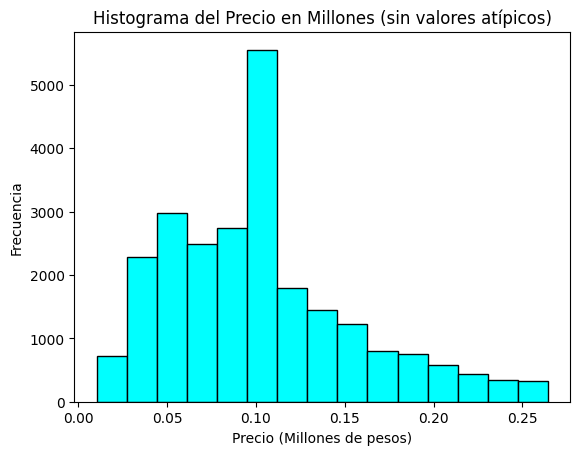

In [ ]:
# Eliminar valores atípicos en la columna de precio
Q1 = df_mexico3['price_millions'].quantile(0.25)
Q3 = df_mexico3['price_millions'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los datos
precio_filtrado = df_mexico3[(df_mexico2['price_millions'] >= limite_inferior) & (df_mexico2['price_millions'] <= limite_superior)]

# Histograma después de eliminar valores atípicos
plt.hist(precio_filtrado['price_millions'], bins=15, color='cyan', edgecolor='black')
plt.title('Histograma del Precio en Millones (sin valores atípicos)')
plt.xlabel('Precio (Millones de pesos)')
plt.ylabel('Frecuencia')
plt.show()



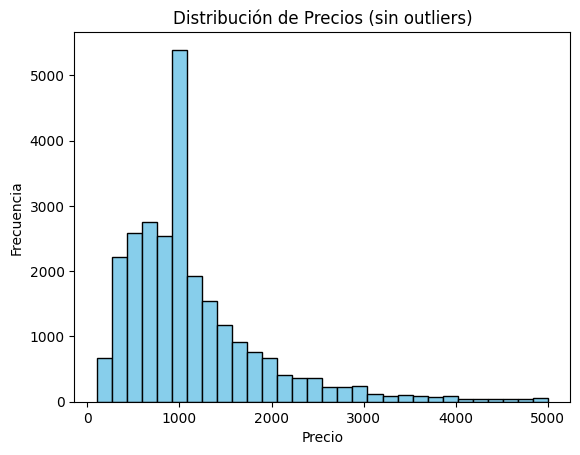

In [ ]:
# Filtrar los precios para eliminar outliers (por ejemplo, precios mayores a 5000)
df_filtered = df_mexico1[df_mexico1['price'] <= 5000]

# Graficar la distribución de precios filtrados
plt.hist(df_filtered['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios (sin outliers)')
plt.show()



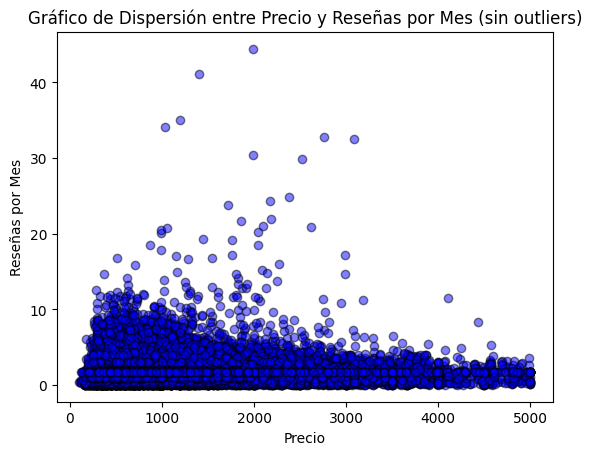

El coeficiente de correlación entre precio y reseñas por mes es: 0.01


In [ ]:
# Filtrar datos para eliminar precios muy altos (outliers)
df_filtered = df_mexico2[df_mexico2['price'] <= 5000]  # Ajusta el valor según sea necesario

# Gráfico de dispersión entre precio y reseñas por mes (datos filtrados)
plt.scatter(df_filtered['price'], df_filtered['reviews_per_month'], alpha=0.5, color='blue', edgecolor='black')
plt.title('Gráfico de Dispersión entre Precio y Reseñas por Mes (sin outliers)')
plt.xlabel('Precio')
plt.ylabel('Reseñas por Mes')
plt.show()

# Calcular la correlación entre las variables (datos filtrados)
correlation = df_filtered['price'].corr(df_filtered['reviews_per_month'])
print(f'El coeficiente de correlación entre precio y reseñas por mes es: {correlation:.2f}')


In [ ]:
# Calcular la correlación entre precio y número de reseñas
correlation_reviews = df_mexico2['price'].corr(df_mexico2['number_of_reviews'])
print(f'El coeficiente de correlación entre precio y número de reseñas es: {correlation_reviews}')

# Si quieres calcular otra correlación, por ejemplo con availability_365
correlation_availability = df_mexico2['price'].corr(df_mexico2['availability_365'])
print(f'El coeficiente de correlación entre precio y disponibilidad es: {correlation_availability}')


# Filtrar los datos para eliminar precios muy altos (outliers)
df_filtered = df_mexico2[df_mexico2['price'] <= 5000]  # Ajusta el valor del límite de precio según sea necesario

# Calcular la correlación entre precio y número de reseñas (datos filtrados)
correlation_reviews = df_filtered['price'].corr(df_filtered['number_of_reviews'])
print(f'El coeficiente de correlación entre precio y número de reseñas (sin outliers) es: {correlation_reviews:.2f}')

# Calcular la correlación entre precio y disponibilidad (datos filtrados)
correlation_availability = df_filtered['price'].corr(df_filtered['availability_365'])
print(f'El coeficiente de correlación entre precio y disponibilidad (sin outliers) es: {correlation_availability:.2f}')


El coeficiente de correlación entre precio y número de reseñas es: -0.02451154611290891
El coeficiente de correlación entre precio y disponibilidad es: 0.026703688954344156
El coeficiente de correlación entre precio y número de reseñas (sin outliers) es: -0.01
El coeficiente de correlación entre precio y disponibilidad (sin outliers) es: 0.05


In [ ]:
# Copiar el DataFrame original
df_mexicolimpio = df_mexico2.copy()

# Definir los límites para eliminar outliers usando percentiles
limite_inferior = df_mexicolimpio['price'].quantile(0.01)  # percentil 1
limite_superior = df_mexicolimpio['price'].quantile(0.99)  # percentil 99

# Filtrar el DataFrame para eliminar outliers
df_mexicolimpio = df_mexicolimpio[(df_mexicolimpio['price'] >= limite_inferior) &
                                  (df_mexicolimpio['price'] <= limite_superior)]

# Comprobar los resultados
print(df_mexicolimpio.describe())


                 id       host_id      latitude     longitude         price  \
count  2.601500e+04  2.601500e+04  26015.000000  26015.000000  26015.000000   
mean   4.957558e+17  2.121477e+08     19.404937    -99.166711   1238.433365   
std    4.687627e+17  1.807772e+08      0.042314      0.033316    988.168353   
min    3.579700e+04  7.365000e+03     19.177848    -99.339630    220.000000   
25%    3.890830e+07  5.030516e+07     19.390645    -99.179150    665.000000   
50%    6.326107e+17  1.544842e+08     19.414995    -99.167600    991.000000   
75%    9.391276e+17  3.694033e+08     19.431810    -99.154618   1434.000000   
max    1.187619e+18  5.857181e+08     19.561010    -98.963360   8243.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    26015.000000       26015.000000       26015.000000   
mean         4.598578          44.007419           1.711235   
std         24.029996          73.681337           1.774511   
min          1.000000           0.00

In [ ]:
# Filtro 1: Buscar los Airbnb del host "Marco" con un precio mayor a 2000
filtro1 = df_mexicolimpio[(df_mexico2["host_name"] == "Marco") & (df_mexicolimpio["price"] > 2000)]
print(filtro1)


                        id                                               name  \
190                2537521     City Skyline views from 2-BR Apt in Roma Norte   
1817              16964657   Abitacion  privada cerca Santa Fe y Interlomas .   
1829              16979384                         habitación en casa privada   
1991              17791988                         habitación en casa privada   
2527              20533918     Edificio de varias plantas en Ciudad de méxico   
2537              20695607  Beautiful apartment in Polanco area with ameni...   
8771              45864031  Alberca climatizada con departamento para grup...   
9080              46728666                  alberca climatizada para grupos!!   
9098              47068033  Alberca climatizada para grupos! departamento ...   
9101              47068737     Departamentos nuevos con alberca climatizada!!   
9378              47975473  Alberca climatizada con departamento para grup...   
9476              48332991  

<ipython-input-48-f008f26097f4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtro1 = df_mexicolimpio[(df_mexico2["host_name"] == "Marco") & (df_mexicolimpio["price"] > 2000)]


In [ ]:
# Filtro 2: Propiedades en Cuauhtémoc con más de 1 reseña por mes
filtro2 = df_mexicolimpio[(df_mexico2["neighbourhood"] == "Cuauhtémoc") & (df_mexicolimpio["reviews_per_month"] > 1)]
print(filtro2)


                        id                                             name  \
5                   939721     Radiant Apartment with Terrace in Roma Norte   
7                   997247              NEW! HISTORIC BUILDING -BEST STREET   
21                  198778                Smack in the Middle of La Condesa   
25                  245507         Best location in town, Reforma Ave area.   
26                 1167552  Big private room with studio, Roma Mexico City.   
...                    ...                                              ...   
26531  1187191423076770832      ¡Crystal! - 7BR Fantastic! In heart of Roma   
26532  1187248376951514656                  Iconic Suite | Terrace | View !   
26533  1187269835146549014            Acogedor y moderno depa en la Condesa   
26534  1187283698786191137                       Estudio con amplia terraza   
26535  1187618795284149417          Apt with Reforma View, Pool and Jacuzzi   

         host_id       host_name neighbourhood   la

<ipython-input-49-ee2d70ebab36>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtro2 = df_mexicolimpio[(df_mexico2["neighbourhood"] == "Cuauhtémoc") & (df_mexicolimpio["reviews_per_month"] > 1)]


In [ ]:
%pip install scipy
%pip install sklearn
#Cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


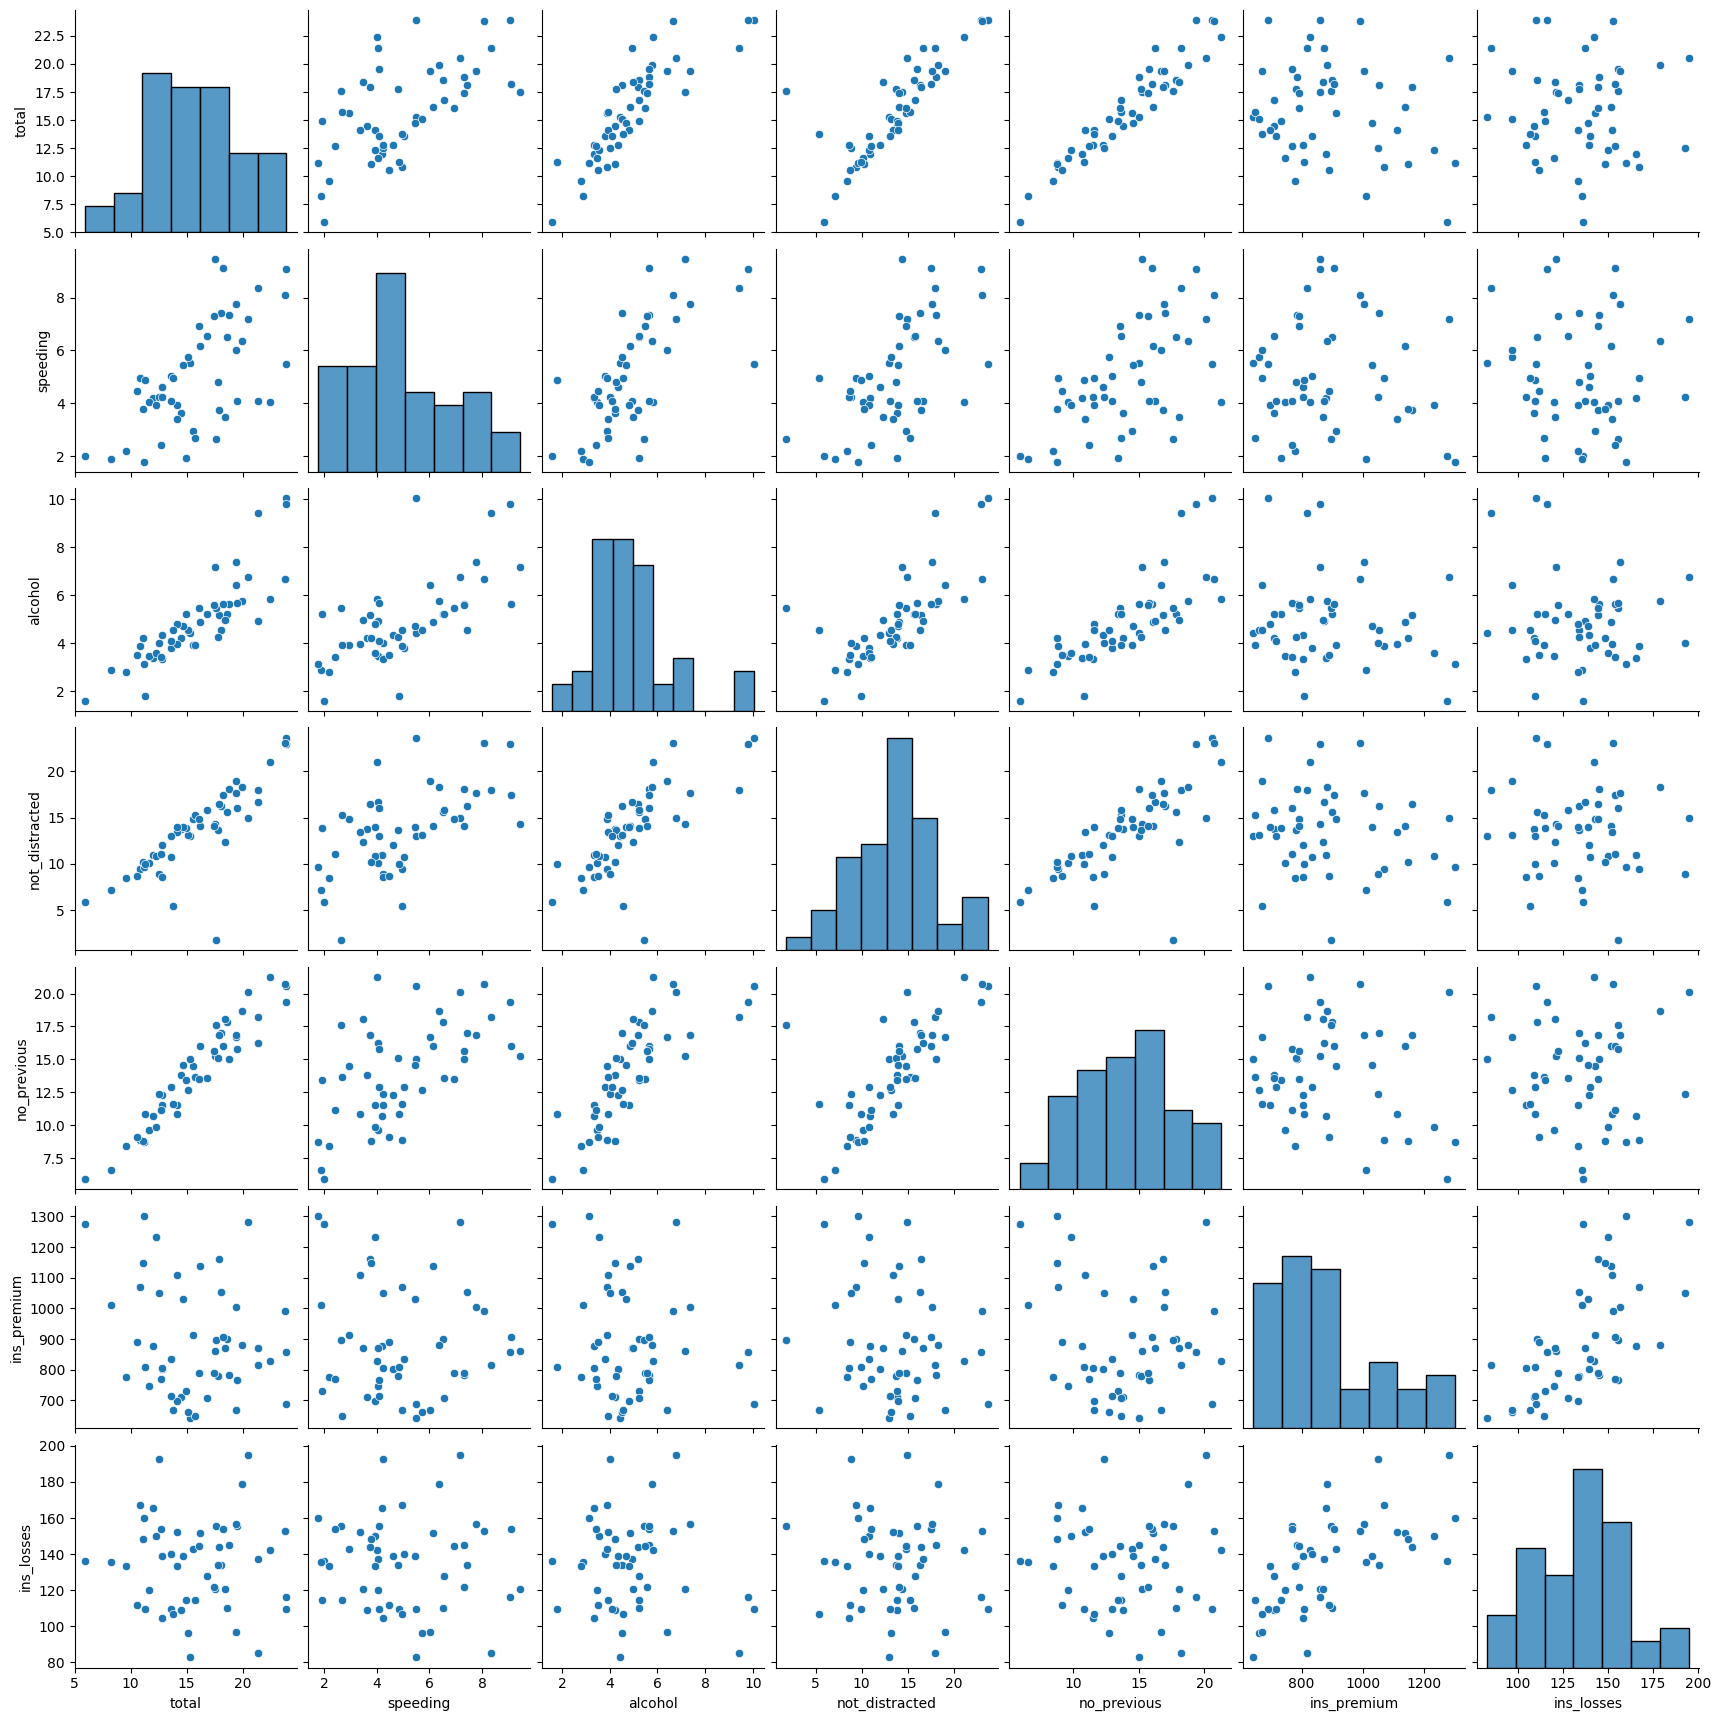

In [ ]:
# Asume que ya tienes el DataFrame df_mexicolimpio en memoria
df_mexicolimpio.head(5)
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep = df_mexicolimpio[['number_of_reviews']]  # Cambia 'ins_losses' por el nombre adecuado
Var_Dep = df_mexicolimpio['price']  # Cambia 'total' por el nombre adecuado

#Redefinimos las variables
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c   ("Función cuadrática")

            y = a*exp(bx) + c   ("Función exponencial")

            y = 1/a*x           ("Función inversa")

            y = a*np.sin(x) + b ("Función senoidal")

            y = a*np.tan(x) + b ("Función tangencial")

            y = a*np.abs(x) + b*x + c (Función Valor absoluto)

            y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

            y = a*np.log(x) + b  (Función logaritmica)

            y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

            y = 1/a*x**2  (Función cuadrática inversa)

            y = a/b*x**2 + c*x (Función polinomial inversa)





Coeficientes del modelo: [ 1.20271456e-03 -8.14503907e-01  1.26541913e+03]


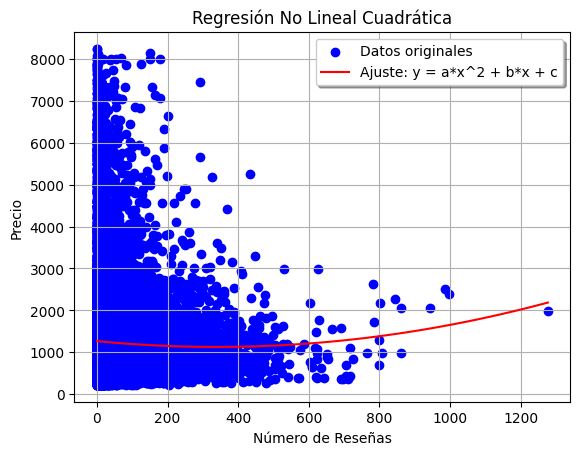

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definimos la función cuadrática
def func1(x, a, b, c):
    return a * x**2 + b * x + c

# Declaramos las variables dependientes e independientes
# Seleccionamos solo una columna para Vars_Indep
Vars_Indep = df_mexicolimpio['number_of_reviews']  # Cambia por la columna deseada
Var_Dep = df_mexicolimpio['price']  # Cambia por la columna deseada

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión no lineal
print("Coeficientes del modelo:", parametros)

# Creamos el modelo de predicción con los parámetros obtenidos
a, b, c = parametros
x = np.linspace(Vars_Indep.min(), Vars_Indep.max(), 100)  # Creamos un rango de x para la predicción
yfit1 = func1(x, a, b, c)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.scatter(Vars_Indep, Var_Dep, color='blue', label="Datos originales")
plt.plot(x, yfit1, color='red', label="Ajuste: y = a*x^2 + b*x + c")
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.title('Regresión No Lineal Cuadrática')
plt.show()



In [ ]:
# Calculamos los valores predichos para TODOS los datos
y_pred = func1(Vars_Indep, *parametros)

# Calculamos el coeficiente de determinación (R²)
R2 = r2_score(Var_Dep, y_pred)

print("Coeficiente de determinación (R²):", R2)


Coeficiente de determinación (R²): 0.0012457476415288493


Coeficientes del modelo: [ 1.20271456e-03 -8.14503907e-01  1.26541913e+03]
Coeficiente de determinación R^2: 0.0012457476415288493


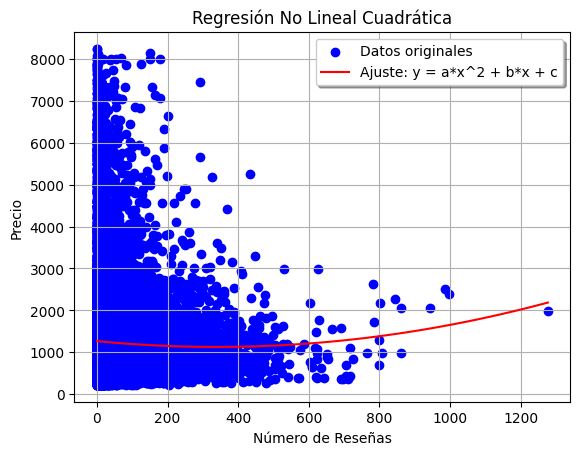

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score  # Importamos la función para calcular R^2

# Definimos la función cuadrática
def func1(x, a, b, c):
    return a * x**2 + b * x + c

# Declaramos las variables dependientes e independientes
Vars_Indep = df_mexicolimpio['number_of_reviews']  # Cambia por la columna deseada
Var_Dep = df_mexicolimpio['price']  # Cambia por la columna deseada

# Ajustamos los parámetros de la función curve_fit
parametros, covs = curve_fit(func1, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión no lineal
print("Coeficientes del modelo:", parametros)

# Creamos el modelo de predicción con los parámetros obtenidos
a, b, c = parametros
x = np.linspace(Vars_Indep.min(), Vars_Indep.max(), 100)  # Creamos un rango de x para la predicción
yfit1 = func1(x, a, b, c)

# Generamos las predicciones para los datos originales
y_pred = func1(Vars_Indep, *parametros)

# Calculamos el coeficiente de determinación R^2
r2_quad = r2_score(Var_Dep, y_pred)
print(f"Coeficiente de determinación R^2: {r2_quad}")

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.scatter(Vars_Indep, Var_Dep, color='blue', label="Datos originales")
plt.plot(x, yfit1, color='red', label="Ajuste: y = a*x^2 + b*x + c")
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.title('Regresión No Lineal Cuadrática')
plt.show()


<ipython-input-66-a4bc124fef4e>:14: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * x) + c
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1003: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
<ipython-input-66-a4bc124fef4e>:17: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, covs2 = curve_fit(func2, Vars_Indep, Var_Dep)


Coeficientes del modelo exponencial: [1. 1. 1.]


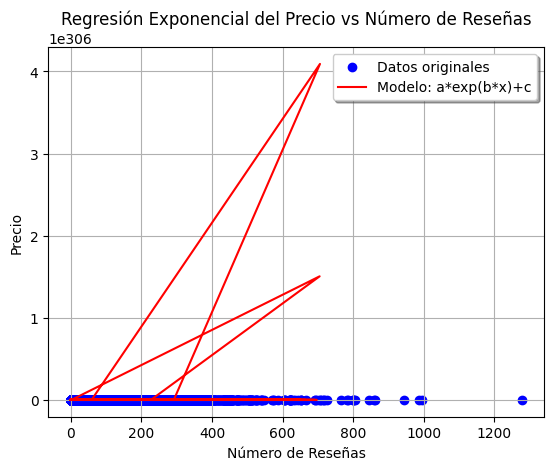

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import pandas as pd

# Suponiendo que ya tienes tu DataFrame df_mexico1 cargado
# Seleccionamos 'number_of_reviews' como la variable independiente y 'price' como la dependiente
Vars_Indep = df_mexicolimpio[['number_of_reviews']].values.flatten()  # Asegúrate de que esta columna tenga sentido
Var_Dep = df_mexicolimpio['price'].values  # Usamos 'price' como variable dependiente

# Definimos la función exponencial
def func2(x, a, b, c):
    return a * np.exp(b * x) + c

# Ajustamos los parámetros de la función curve_fit
parametros2, covs2 = curve_fit(func2, Vars_Indep, Var_Dep)

# Obtenemos los coeficientes del modelo de regresión no lineal
print("Coeficientes del modelo exponencial:", parametros2)

# Creamos el modelo de predicción con los parámetros obtenidos
yfit2 = func2(Vars_Indep, *parametros2)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.scatter(Vars_Indep, Var_Dep, color='blue', label="Datos originales")
plt.plot(Vars_Indep, yfit2, color='red', label="Modelo: a*exp(b*x)+c")
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio')
plt.title('Regresión Exponencial del Precio vs Número de Reseñas')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()




Coeficientes del modelo exponencial: [ 7.55662118e-05  5.66084659e-01 -1.71579730e-04]
Coeficiente de determinación (R²): 3.874639001999469e-05


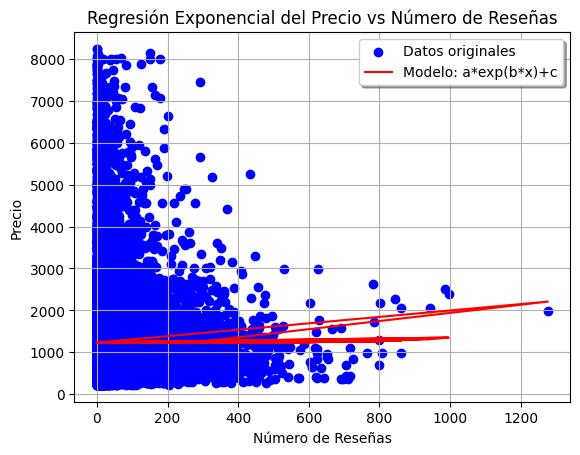

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Suponiendo que ya tienes tu DataFrame df_mexicolimpio cargado
Vars_Indep = df_mexicolimpio[['number_of_reviews']].values.flatten()  # Variable independiente
Var_Dep = df_mexicolimpio['price'].values  # Variable dependiente

# Escalamos los datos para evitar desbordamiento
scaler_x = StandardScaler()
scaler_y = StandardScaler()

Vars_Indep_scaled = scaler_x.fit_transform(Vars_Indep.reshape(-1, 1)).flatten()
Var_Dep_scaled = scaler_y.fit_transform(Var_Dep.reshape(-1, 1)).flatten()

# Definimos la función exponencial
def func2(x, a, b, c):
    return a * np.exp(b * x) + c

# Ajustamos los parámetros de la función curve_fit con valores iniciales
parametros2, covs2 = curve_fit(func2, Vars_Indep_scaled, Var_Dep_scaled, p0=[1, 1, 1])

# Obtenemos los coeficientes del modelo de regresión no lineal
print("Coeficientes del modelo exponencial:", parametros2)

# Calculamos los valores predichos para TODOS los datos
y_pred_scaled = func2(Vars_Indep_scaled, *parametros2)

# Invertimos la escala para obtener las predicciones originales
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Calculamos el coeficiente de determinación (R²)
R2 = r2_score(Var_Dep, y_pred)

print("Coeficiente de determinación (R²):", R2)

# Graficamos las predicciones y los datos originales para realizar la comparación
plt.scatter(Vars_Indep, Var_Dep, color='blue', label="Datos originales")
plt.plot(Vars_Indep, y_pred, color='red', label="Modelo: a*exp(b*x)+c")
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio')
plt.title('Regresión Exponencial del Precio vs Número de Reseñas')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()


In [ ]:
df_mexicolimpio.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'price_millions'],
      dtype='object')

### **host_response_rate**

In [ ]:
df_mexicolimpio.rename(columns={'number_of_reviews': 'host_response_rate'}, inplace=True)

In [ ]:
import numpy as np
import pandas as pd

# Asegúrate de que tienes tu DataFrame df_mexicolimpio cargado
# Renombramos la columna 'number_of_reviews' a 'host_response_rate'
df_mexicolimpio.rename(columns={'number_of_reviews': 'host_response_rate'}, inplace=True)

# Verifica que el renombrado fue exitoso
print(df_mexicolimpio.columns)  # Esto mostrará todas las columnas para verificar

# Ahora puedes proceder con el reemplazo y la limpieza
# Reemplazar 'Unknown' por NaN
df_mexicolimpio['host_response_rate'] = df_mexicolimpio['host_response_rate'].replace('Unknown', np.nan)

# Verifica si hay algún dato de tipo string en la columna que necesita limpieza
# Esto es opcional, pero puede ayudar a prevenir futuros errores
if df_mexicolimpio['host_response_rate'].dtype == 'object':
    # Eliminar el símbolo '%' y convertir a float
    df_mexicolimpio['host_response_rate'] = df_mexicolimpio['host_response_rate'].str.replace('%', '').astype(float)

# Rellenar NaN con la media
df_mexicolimpio['host_response_rate'].fillna(df_mexicolimpio['host_response_rate'].median(), inplace=True)

# Verifica el resultado
print(df_mexicolimpio['host_response_rate'].head())


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'host_response_rate', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'price_millions'],
      dtype='object')
0      0
1     56
3    161
4     49
5    526
Name: host_response_rate, dtype: int64


Coeficiente de determinación (R²): 0.001393619654025513


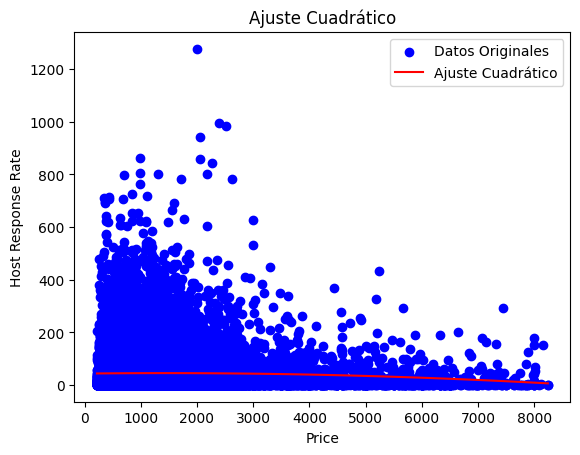

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Definir la función cuadrática
def cuadratica(x, a, b, c):
    return a * x**2 + b * x + c

# Seleccionar las variables de interés
x = df_mexicolimpio['price']
y = df_mexicolimpio['host_response_rate']

# Ajustar la función cuadrática a los datos
params_cuadratica, _ = curve_fit(cuadratica, x, y)
a, b, c = params_cuadratica

# Calcular los valores predichos usando el modelo cuadrático
y_pred_cuadratica = cuadratica(x, a, b, c)

# Calcular el coeficiente de determinación (R²)
r2_cuadratica = r2_score(y, y_pred_cuadratica)
print("Coeficiente de determinación (R²):", r2_cuadratica)

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
x_fit = np.linspace(min(x), max(x), 100)
y_fit_cuadratica = cuadratica(x_fit, a, b, c)
plt.plot(x_fit, y_fit_cuadratica, color='red', label='Ajuste Cuadrático')
plt.xlabel('Price')
plt.ylabel('Host Response Rate')
plt.legend()
plt.title('Ajuste Cuadrático')
plt.show()



price                 0
host_response_rate    0
dtype: int64
price                 0
host_response_rate    0
dtype: int64
Coeficiente de determinación (R²): -9.729193329810207e+35


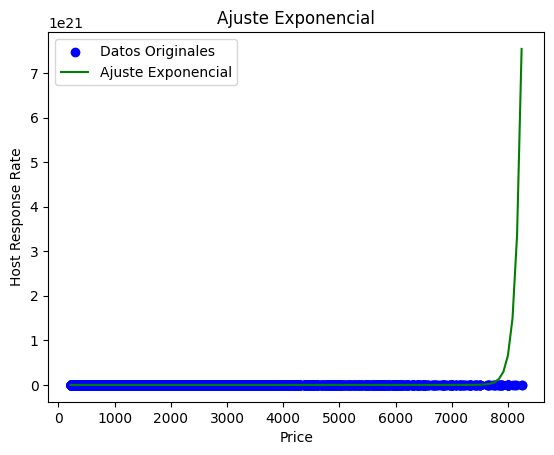

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Definir la función exponencial
def exponencial(x, a, b, c):
    return a * np.exp(b * x) + c

# Seleccionar las variables de interés
x = df_mexicolimpio['price']
y = df_mexicolimpio['host_response_rate']

# Verifica si hay valores nulos o infinitos
print(df_mexicolimpio[['price', 'host_response_rate']].isnull().sum())
print(np.isinf(df_mexicolimpio[['price', 'host_response_rate']]).sum())

# Filtrar los datos para eliminar valores nulos o infinitos
df_mexicolimpio = df_mexicolimpio[
    df_mexicolimpio['price'].notnull() &
    df_mexicolimpio['host_response_rate'].notnull() &
    ~np.isinf(df_mexicolimpio['price']) &
    ~np.isinf(df_mexicolimpio['host_response_rate'])
]

# Actualizar las variables después de limpiar los datos
x = df_mexicolimpio['price']
y = df_mexicolimpio['host_response_rate']

# Ajustar la función exponencial a los datos con parámetros iniciales
initial_params = [1, 0.01, 1]  # Ajusta estos valores según tus datos
params_exponencial, _ = curve_fit(exponencial, x, y, p0=initial_params)

# Calcular los valores predichos usando el modelo exponencial
y_pred_exponencial = exponencial(x, *params_exponencial)

# Calcular el coeficiente de determinación (R²)
r2_exponencial = r2_score(y, y_pred_exponencial)
print("Coeficiente de determinación (R²):", r2_exponencial)

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
y_fit_exponencial = exponencial(x_fit, *params_exponencial)
plt.plot(x_fit, y_fit_exponencial, color='green', label='Ajuste Exponencial')
plt.xlabel('Price')
plt.ylabel('Host Response Rate')
plt.legend()
plt.title('Ajuste Exponencial')
plt.show()


## **host_acceptance_rate**

In [ ]:
# Renombrar la columna 'number_of_reviews' a 'host_acceptance_rate'
df_mexicolimpio.rename(columns={'number_of_reviews_ltm': 'host_acceptance_rate'}, inplace=True)

# Comprobar si la nueva columna existe en el DataFrame
if 'host_acceptance_rate' in df_mexicolimpio.columns:
    # Reemplazar 'Unknown' por NaN
    df_mexicolimpio['host_acceptance_rate'] = df_mexicolimpio['host_acceptance_rate'].replace('Unknown', np.nan)

    # Eliminar el símbolo '%' y convertir a float
    df_mexicolimpio['host_acceptance_rate'] = df_mexicolimpio['host_acceptance_rate'].astype(float)

    # Rellenar NaN con la mediana
    df_mexicolimpio['host_acceptance_rate'].fillna(df_mexicolimpio['host_acceptance_rate'].median(), inplace=True)

    # Mostrar el resultado para verificar
    print(df_mexicolimpio[['host_acceptance_rate']].head())
else:
    print("La columna 'host_acceptance_rate' no se encuentra en el DataFrame.")



   host_acceptance_rate
0                   0.0
1                   3.0
3                   6.0
4                   4.0
5                  22.0


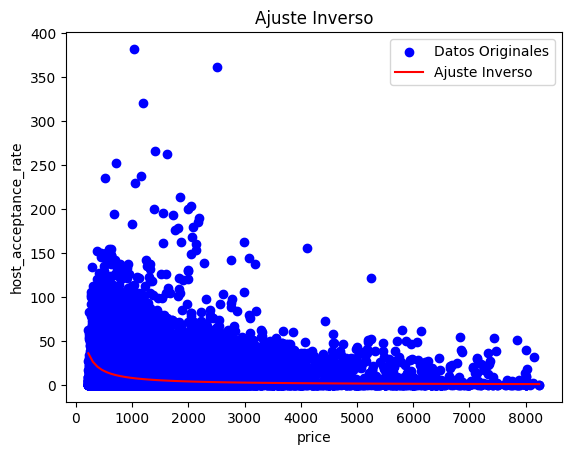

In [ ]:
# Definir la función inversa
def inversa(x, a):
    return 1 / (a * x)

# Seleccionar las variables de interés
x = df_mexicolimpio['price']
y = df_mexicolimpio['host_acceptance_rate']

# Ajustar la función inversa a los datos
params_inversa, _ = curve_fit(inversa, x, y)
a_inv = params_inversa[0]

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
x_fit = np.linspace(min(x), max(x), 100)
y_fit_inversa = inversa(x_fit, a_inv)
plt.plot(x_fit, y_fit_inversa, color='red', label='Ajuste Inverso')
plt.xlabel('price')
plt.ylabel('host_acceptance_rate')
plt.legend()
plt.title('Ajuste Inverso')
plt.show()


In [ ]:
# Calculamos el coeficiente de determinación (R²)
y_pred_inversa = inversa(x, a_inv)
r2_inversa = r2_score(y, y_pred_inversa)

# Imprimir el resultado
print("Coeficiente de determinación (R²):", r2_inversa)

Coeficiente de determinación (R²): -0.14561962680694873


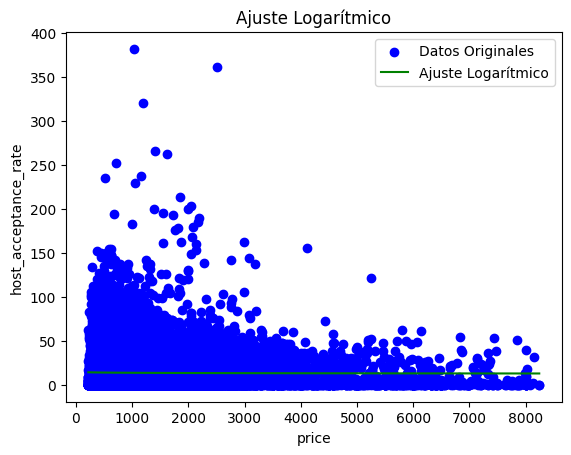

In [ ]:
# Definir la función logarítmica
def logaritmica(x, a, b):
    return a * np.log(x) + b

# Ajustar la función logarítmica a los datos
params_logaritmica, _ = curve_fit(logaritmica, x, y)
a_log, b_log = params_logaritmica

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
y_fit_logaritmica = logaritmica(x_fit, a_log, b_log)
plt.plot(x_fit, y_fit_logaritmica, color='green', label='Ajuste Logarítmico')
plt.xlabel('price')
plt.ylabel('host_acceptance_rate')
plt.legend()
plt.title('Ajuste Logarítmico')
plt.show()


## **host_total_listings_count**

In [ ]:
# Definir la función cociente entre polinomios
def cociente_polinomio(x, a, b, c):
    return (a * x**2 + b) / (c * x)

# Seleccionar las variables de interés
x = df_mexicolimpio['price']
y = df_mexicolimpio['host_total_listings_count']

# Ajustar la función de cociente entre polinomios a los datos
params_cociente, _ = curve_fit(cociente_polinomio, x, y)
a_coc, b_coc, c_coc = params_cociente

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
x_fit = np.linspace(min(x), max(x), 100)
y_fit_cociente = cociente_polinomio(x_fit, a_coc, b_coc, c_coc)
plt.plot(x_fit, y_fit_cociente, color='red', label='Ajuste Cociente Polinomios')
plt.xlabel('price')
plt.ylabel('host_total_listings_count')
plt.legend()
plt.title('Ajuste Cociente entre Polinomios')
plt.show()


KeyError: 'host_total_listings_count'

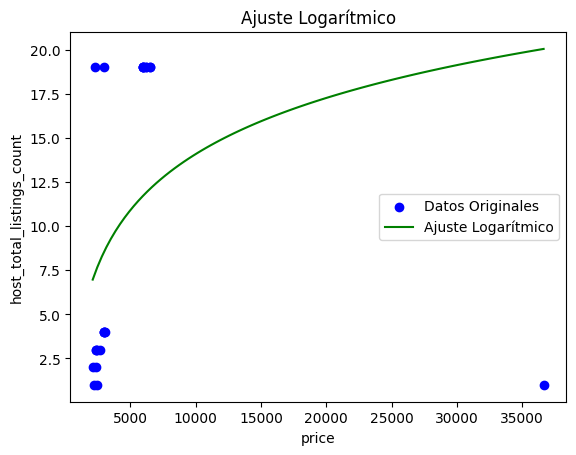

In [ ]:
# Definir la función logarítmica
def logaritmica(x, a, b):
    return a * np.log(x) + b

# Ajustar la función logarítmica a los datos
params_logaritmica, _ = curve_fit(logaritmica, x, y)
a_log, b_log = params_logaritmica

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
y_fit_logaritmica = logaritmica(x_fit, a_log, b_log)
plt.plot(x_fit, y_fit_logaritmica, color='green', label='Ajuste Logarítmico')
plt.xlabel('price')
plt.ylabel('host_total_listings_count')
plt.legend()
plt.title('Ajuste Logarítmico')
plt.show()


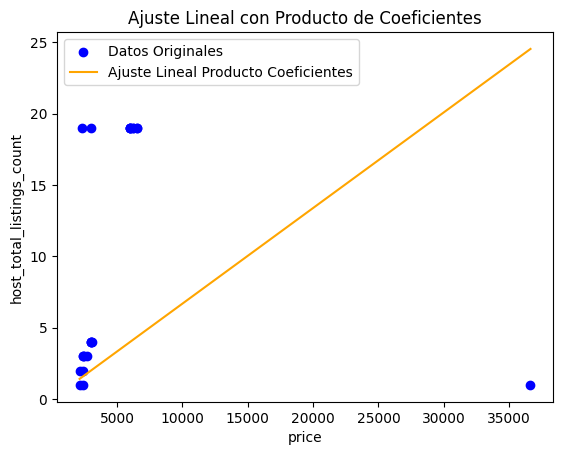

In [ ]:
# Definir la función lineal con producto de coeficientes
def lineal_producto(x, a, b, c):
    return a * x + b * x + c * x

# Ajustar la función lineal con producto de coeficientes a los datos
params_lineal_producto, _ = curve_fit(lineal_producto, x, y)
a_lin, b_lin, c_lin = params_lineal_producto

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
y_fit_lineal_producto = lineal_producto(x_fit, a_lin, b_lin, c_lin)
plt.plot(x_fit, y_fit_lineal_producto, color='orange', label='Ajuste Lineal Producto Coeficientes')
plt.xlabel('price')
plt.ylabel('host_total_listings_count')
plt.legend()
plt.title('Ajuste Lineal con Producto de Coeficientes')
plt.show()


## **accommodates**

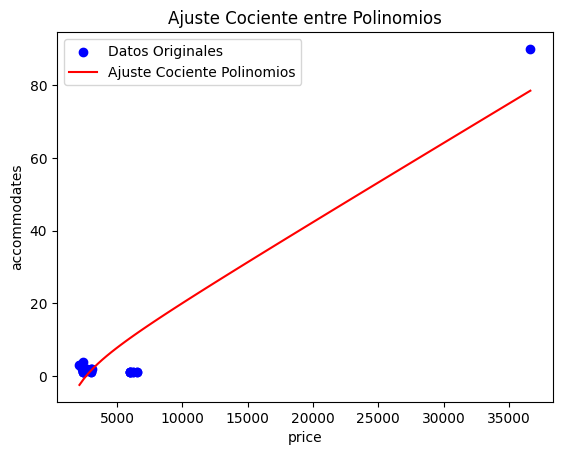

In [ ]:
# Definir la función cociente entre polinomios
def cociente_polinomio(x, a, b, c):
    return (a * x**2 + b) / (c * x)

# Seleccionar las variables de interés
x = df_mexico2['price']
y = df_mexico2['accommodates']

# Ajustar la función de cociente entre polinomios a los datos
params_cociente, _ = curve_fit(cociente_polinomio, x, y)
a_coc, b_coc, c_coc = params_cociente

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
x_fit = np.linspace(min(x), max(x), 100)
y_fit_cociente = cociente_polinomio(x_fit, a_coc, b_coc, c_coc)
plt.plot(x_fit, y_fit_cociente, color='red', label='Ajuste Cociente Polinomios')
plt.xlabel('price')
plt.ylabel('accommodates')
plt.legend()
plt.title('Ajuste Cociente entre Polinomios')
plt.show()


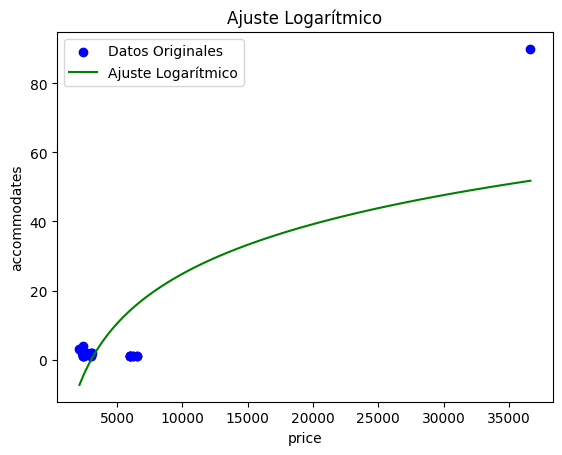

In [ ]:
# Definir la función logarítmica
def logaritmica(x, a, b):
    return a * np.log(x) + b

# Ajustar la función logarítmica a los datos
params_logaritmica, _ = curve_fit(logaritmica, x, y)
a_log, b_log = params_logaritmica

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
y_fit_logaritmica = logaritmica(x_fit, a_log, b_log)
plt.plot(x_fit, y_fit_logaritmica, color='green', label='Ajuste Logarítmico')
plt.xlabel('price')
plt.ylabel('accommodates')
plt.legend()
plt.title('Ajuste Logarítmico')
plt.show()


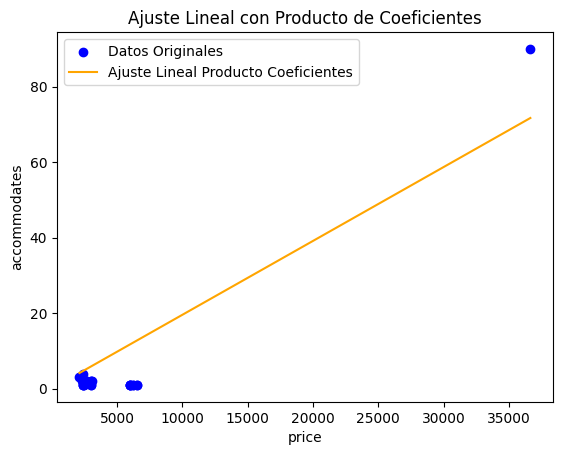

In [ ]:
# Definir la función lineal con producto de coeficientes
def lineal_producto(x, a, b, c):
    return a * x + b * x + c * x

# Ajustar la función lineal con producto de coeficientes a los datos
params_lineal_producto, _ = curve_fit(lineal_producto, x, y)
a_lin, b_lin, c_lin = params_lineal_producto

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
y_fit_lineal_producto = lineal_producto(x_fit, a_lin, b_lin, c_lin)
plt.plot(x_fit, y_fit_lineal_producto, color='orange', label='Ajuste Lineal Producto Coeficientes')
plt.xlabel('price')
plt.ylabel('accommodates')
plt.legend()
plt.title('Ajuste Lineal con Producto de Coeficientes')
plt.show()


## **reviews_per_month**

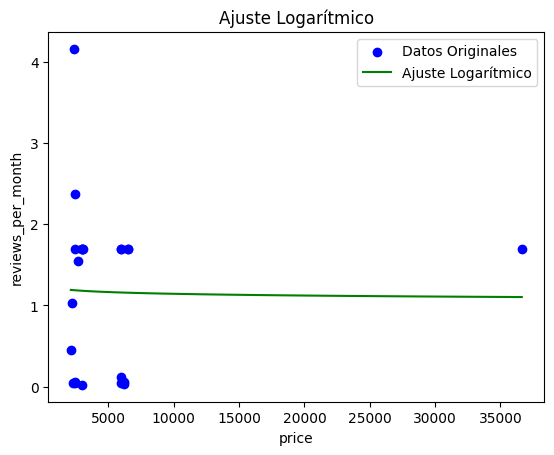

In [ ]:
# Definir la función logarítmica
def logaritmica(x, a, b):
    return a * np.log(x) + b

# Seleccionar las variables de interés
x = df_mexico2['price']
y = df_mexico2['reviews_per_month']

# Ajustar la función logarítmica a los datos
params_logaritmica, _ = curve_fit(logaritmica, x, y)
a_log, b_log = params_logaritmica

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
x_fit = np.linspace(min(x), max(x), 100)
y_fit_logaritmica = logaritmica(x_fit, a_log, b_log)
plt.plot(x_fit, y_fit_logaritmica, color='green', label='Ajuste Logarítmico')
plt.xlabel('price')
plt.ylabel('reviews_per_month')
plt.legend()
plt.title('Ajuste Logarítmico')
plt.show()


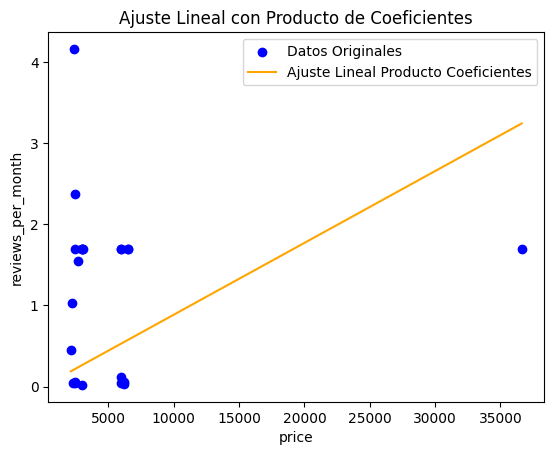

In [ ]:
# Definir la función lineal con producto de coeficientes
def lineal_producto(x, a, b, c):
    return a * x + b * x + c * x

# Ajustar la función lineal con producto de coeficientes a los datos
params_lineal_producto, _ = curve_fit(lineal_producto, x, y)
a_lin, b_lin, c_lin = params_lineal_producto

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
y_fit_lineal_producto = lineal_producto(x_fit, a_lin, b_lin, c_lin)
plt.plot(x_fit, y_fit_lineal_producto, color='orange', label='Ajuste Lineal Producto Coeficientes')
plt.xlabel('price')
plt.ylabel('reviews_per_month')
plt.legend()
plt.title('Ajuste Lineal con Producto de Coeficientes')
plt.show()


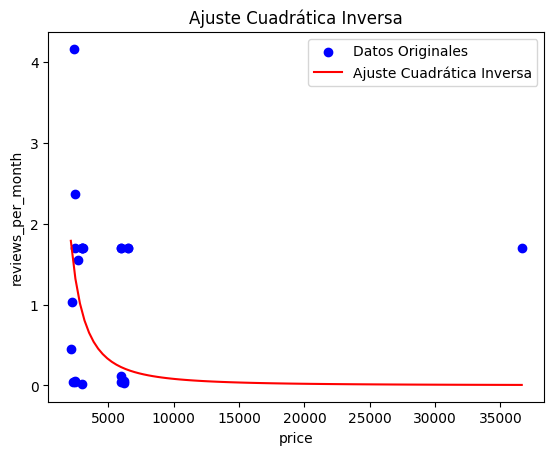

In [ ]:
# Definir la función cuadrática inversa
def cuadratica_inversa(x, a):
    return 1 / (a * x**2)

# Ajustar la función cuadrática inversa a los datos
params_cuadratica_inversa, _ = curve_fit(cuadratica_inversa, x, y)
a_cuadr_inv = params_cuadratica_inversa[0]

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
y_fit_cuadratica_inversa = cuadratica_inversa(x_fit, a_cuadr_inv)
plt.plot(x_fit, y_fit_cuadratica_inversa, color='red', label='Ajuste Cuadrática Inversa')
plt.xlabel('price')
plt.ylabel('reviews_per_month')
plt.legend()
plt.title('Ajuste Cuadrática Inversa')
plt.show()


## **Price**

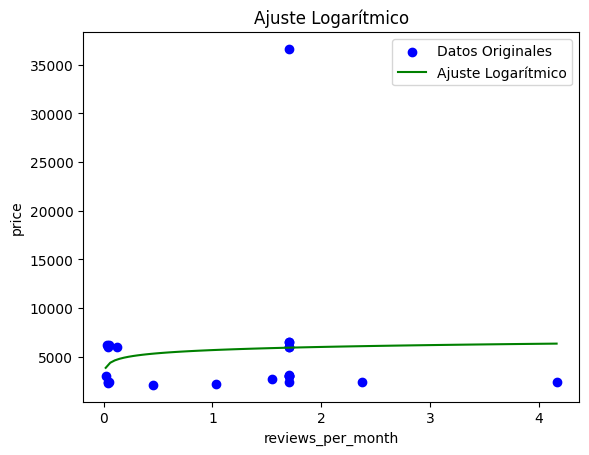

In [ ]:
# Definir la función logarítmica
def logaritmica(x, a, b):
    return a * np.log(x) + b

# Seleccionar las variables de interés
x = df_mexico2['reviews_per_month']
y = df_mexico2['price']

# Ajustar la función logarítmica a los datos
params_logaritmica, _ = curve_fit(logaritmica, x, y)
a_log, b_log = params_logaritmica

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
x_fit = np.linspace(min(x), max(x), 100)
y_fit_logaritmica = logaritmica(x_fit, a_log, b_log)
plt.plot(x_fit, y_fit_logaritmica, color='green', label='Ajuste Logarítmico')
plt.xlabel('reviews_per_month')
plt.ylabel('price')
plt.legend()
plt.title('Ajuste Logarítmico')
plt.show()


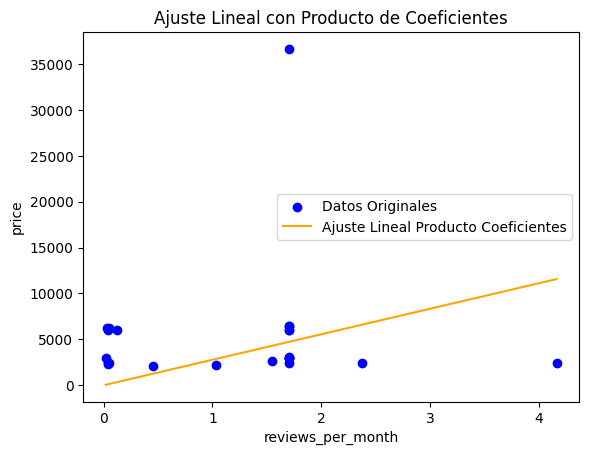

In [ ]:
# Definir la función lineal con producto de coeficientes
def lineal_producto(x, a, b, c):
    return a * x + b * x + c * x

# Ajustar la función lineal con producto de coeficientes a los datos
params_lineal_producto, _ = curve_fit(lineal_producto, x, y)
a_lin, b_lin, c_lin = params_lineal_producto

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
y_fit_lineal_producto = lineal_producto(x_fit, a_lin, b_lin, c_lin)
plt.plot(x_fit, y_fit_lineal_producto, color='orange', label='Ajuste Lineal Producto Coeficientes')
plt.xlabel('reviews_per_month')
plt.ylabel('price')
plt.legend()
plt.title('Ajuste Lineal con Producto de Coeficientes')
plt.show()


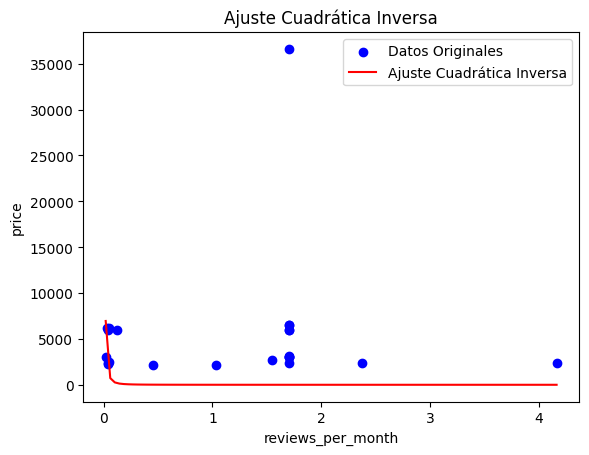

In [ ]:
# Definir la función cuadrática inversa
def cuadratica_inversa(x, a):
    return 1 / (a * x**2)

# Ajustar la función cuadrática inversa a los datos
params_cuadratica_inversa, _ = curve_fit(cuadratica_inversa, x, y)
a_cuadr_inv = params_cuadratica_inversa[0]

# Graficar los datos y la función ajustada
plt.scatter(x, y, color='blue', label='Datos Originales')
y_fit_cuadratica_inversa = cuadratica_inversa(x_fit, a_cuadr_inv)
plt.plot(x_fit, y_fit_cuadratica_inversa, color='red', label='Ajuste Cuadrática Inversa')
plt.xlabel('reviews_per_month')
plt.ylabel('price')
plt.legend()
plt.title('Ajuste Cuadrática Inversa')
plt.show()


In [ ]:
# Guardar el archivo CSV procesado
df_mexico1.to_csv("Mexico_dflimpio.csv", index=False)



AUSTRALIA

In [ ]:
df_australia1

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,Palermo,-34.581840,-58.424150,Entire home/apt,60390.0,3,42,2024-07-28,0.28,1,276,6
1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,Palermo,-34.586170,-58.410360,Entire home/apt,37001.0,7,120,2024-07-07,0.81,7,37,10
2,15074,ROOM WITH RIVER SIGHT,59338,Monica,Nuñez,-34.538920,-58.465990,Private room,NaN,29,0,NaN,NaN,1,0,0
3,96490,AMPLIA habitación individual en Buenos Aires,512049,Cristina,Palermo,-34.585030,-58.412060,Private room,8000.0,7,1,2023-01-15,0.05,2,352,0
4,16695,DUPLEX LOFT 2 - SAN TELMO,64880,Elbio Mariano,Monserrat,-34.614390,-58.376110,Entire home/apt,47275.0,2,45,2019-11-30,0.27,9,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36802,1229850667204739570,Maipu II Apartament Premiun,139740485,Edgardo Alfredo,Retiro,-34.598654,-58.376981,Entire home/apt,24423.0,3,0,NaN,NaN,6,176,0
36803,1229856590380024491,Disfruta de una hermosa terraza privada,201402350,Yael Vanina,Recoleta,-34.592317,-58.398333,Entire home/apt,18910.0,60,0,NaN,NaN,73,365,0
36804,1229879123121211983,Enjoy an apartment with the amenities of 5* Hotel,879081,Emiliana,Palermo,-34.572590,-58.440529,Entire home/apt,37820.0,4,0,NaN,NaN,11,180,0
36805,1229928590518388653,Hermoso Penthouse en Palermo Hollywood,14450833,Alejandro,Palermo,-34.579028,-58.432362,Entire home/apt,31476.0,1,0,NaN,NaN,22,362,0


In [ ]:
#Identificar valores nulos por columna
valores_nulos=df_australia1.isnull().sum()
valores_nulos

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,2956
minimum_nights,0


In [ ]:
# Imprimir los primeros 5 registros del dataframe de Australia
df_australia.head()

df_australia1 = df_australia.copy()

# Eliminar columnas innecesarias en Australia (ajusta según tu necesidad)
df_australia1 = df_australia1.drop(['0', 'Referencia'], axis=1, errors='ignore')
df_australia1

##eliminar colundas con nas
df_australia1 = df_australia1.drop(columns=['license', 'neighbourhood_group'])

# Identificar valores nulos por columna en Australia
valores_nulos_australia = df_australia1.isnull().sum()
print(valores_nulos_australia)





KeyError: "['license', 'neighbourhood_group'] not found in axis"

In [ ]:
df_australia1["price"] = df_australia1["price"].fillna(round(df_australia1["price"].mean(), 1))


In [ ]:
# Convertir la columna 'last_review' a tipo datetime si no lo está
df_australia1["last_review"] = pd.to_datetime(df_australia1["last_review"], errors='coerce')

# Rellenar valores nulos en 'last_review' con una fecha específica (por ejemplo, el 1 de enero de 2023)
df_australia1["last_review"] = df_australia1["last_review"].fillna(pd.Timestamp("2023-01-01"))

# Rellenar valores nulos en 'reviews_per_month' con la media redondeada a un decimal
df_australia1["reviews_per_month"] = df_australia1["reviews_per_month"].fillna(round(df_australia1["reviews_per_month"].mean(), 1))


In [ ]:
#Identificar valores nulos por columna
valores_nulos=df_australia1.isnull().sum()
valores_nulos

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


In [ ]:
# Guardar el archivo CSV procesado
df_australia1.to_csv("Australia_dflimpio.csv", index=False)

Buenos Aires

In [ ]:
df_buenos_aires

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,71825,"River Room, Bellingen Treehouse",369209,Kirsty,NaN,Bellingen,-30.368930,152.885340,Private room,300.0,2,336,2024-07-08,2.23,3,328,26,PID-STRA-6155
1,325891,Kiwarrak Country Retreat-The Arbour,1666893,Tara And Meg,NaN,Mid-Coast,-31.969030,152.508380,Entire home/apt,187.0,2,119,2024-08-02,0.85,2,268,4,PID-STRA-9140-2
2,325913,Kiwarrak Country Retreat -The Bower,1666893,Tara And Meg,NaN,Mid-Coast,-31.967230,152.508140,Entire home/apt,183.0,2,216,2024-08-31,1.66,2,237,26,PID-STRA-9140-2
3,502508,"Private, separate, ground floor rooms.",2479893,Peter And Ksenia,NaN,Nambucca Valley,-30.640458,153.006355,Entire home/apt,95.0,1,1114,2024-08-16,7.65,1,74,94,PID-STRA-3614
4,534462,Tree Tops Scott’s Head sleeps 8 & 100m to beach.,2626160,Nick,NaN,Nambucca Valley,-30.747110,152.994800,Entire home/apt,294.0,2,257,2024-08-03,1.84,1,289,23,PID-STRA-20136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829,1238055914294176940,32 Shores Crescent,412596172,Emma,NaN,Mid-Coast,-32.039300,152.537507,Entire home/apt,371.0,1,0,NaN,NaN,34,338,0,PID-STRA-66562
4830,1238116656137959802,Flynns Beach Seascape,477629292,Melanie,NaN,Port Macquarie-Hastings,-31.443440,152.924490,Entire home/apt,278.0,1,0,NaN,NaN,31,365,0,PID-STRA-69394
4831,1238223838821040409,Hamptons Beach Resort at One Mile Beach,159356136,Paula,NaN,Mid-Coast,-32.197563,152.533995,Entire home/apt,118.0,1,0,NaN,NaN,3,335,0,PID-STRA-69215
4832,1238680346472520537,208 The Boathouse,23595955,Alison,NaN,Mid-Coast,-32.660894,152.158060,Entire home/apt,251.0,1,0,NaN,NaN,40,363,0,PID-STRA-69725


In [ ]:
#Identificar valores nulos por columna
valores_nulos=df_buenos_aires.isnull().sum()
valores_nulos

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,4834
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,220


In [ ]:
# Eliminar las filas con valores nulos en 'neighbourhood_group' ya que hay muchos valores nulos
df_buenos_aires = df_buenos_aires.dropna(subset=['neighbourhood_group'])

# Para 'price', rellenamos los valores nulos con la mediana (puedes usar la media si prefieres)
df_buenos_aires['price'] = df_buenos_aires['price'].fillna(df_buenos_aires['price'].median())

# Para 'last_review', convertimos la columna a datetime y rellenamos con una fecha específica (ej. "2023-01-01")
df_buenos_aires['last_review'] = pd.to_datetime(df_buenos_aires['last_review'], errors='coerce')
df_buenos_aires['last_review'] = df_buenos_aires['last_review'].fillna(pd.Timestamp("2023-01-01"))

# Para 'reviews_per_month', rellenamos con la mediana
df_buenos_aires['reviews_per_month'] = df_buenos_aires['reviews_per_month'].fillna(df_buenos_aires['reviews_per_month'].median())

# Para 'license', como hay pocos valores nulos, podrías rellenar con 'Sin licencia' u otro valor
df_buenos_aires['license'] = df_buenos_aires['license'].fillna('Sin licencia')

# Verificar si quedan nulos
print(df_buenos_aires.isnull().sum())


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64


In [ ]:
# Revisamos las columnas disponibles en el DataFrame
print(df_buenos_aires.columns)


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')
